In [24]:
import pandas as pd
from pathlib import Path
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [25]:
base_path = Path("../../../SELFCLEAN/Presentation_SelfClean")

In [26]:
analysis = base_path / "Notebooks/V1Analyse"

In [27]:
os.path.exists(analysis)

True

In [28]:
dino_irrelevant = pd.read_csv(analysis / "Dino_Irrelevant.csv")

In [29]:
dino_irrelevant

,Unnamed: 0,indices,scores,path,label
0,0,55,0.727087,../Dataset/Horw/Horw_2404.JPG,Horw
1,1,61,0.727087,../Dataset/Horw/Horw_2411.JPG,Horw
2,2,48,0.742514,../Dataset/Horw/Horw_2397.JPG,Horw
3,3,56,0.749165,../Dataset/Horw/Horw_2405.JPG,Horw
4,4,192,0.753766,../Dataset/Rotkreuz/Rotkreuz_2552.JPG,Rotkreuz
...,...,...,...,...,...
188,188,123,0.902892,../Dataset/Rotkreuz/Rotkreuz_2475.JPG,Rotkreuz
189,189,138,0.902893,../Dataset/Rotkreuz/Rotkreuz_2492.JPG,Rotkreuz
190,190,187,0.902894,../Dataset/Rotkreuz/Rotkreuz_2545.JPG,Rotkreuz
191,191,167,0.902895,../Dataset/Rotkreuz/Rotkreuz_2523.JPG,Rotkreuz


In [30]:
for index, datapoint in dino_irrelevant.head(10).iterrows():
    path = datapoint["path"]
    print(path)
    # Read and display the image
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    #plt.show()
    plt.close()

../Dataset/Horw/Horw_2404.JPG


FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/SELFCLEAN/Presentation_SelfClean/Dataset/Horw/Horw_2404.JPG'

## Delete four images

In [22]:
to_be_deleted = ["../Dataset/Horw/Horw_2404.JPG", 
"../Dataset/Horw/Horw_2411.JPG",
"../Dataset/Horw/Horw_2397.JPG",
"../Dataset/Horw/Horw_2405.JPG"]

In [23]:
def delete_images(image_paths):
    for path in image_paths:
        if os.path.exists(path):
            try:
                os.remove(path)
                print(f"Deleted: {path}")
            except Exception as e:
                print(f"Error deleting {path}: {e}")
        else:
            print(f"File not found: {path}")


delete_images(to_be_deleted)

Deleted: ../Dataset/Horw/Horw_2404.JPG
Deleted: ../Dataset/Horw/Horw_2411.JPG
Deleted: ../Dataset/Horw/Horw_2397.JPG
Deleted: ../Dataset/Horw/Horw_2405.JPG


### Analysis of near Duplicates

In [32]:
dino_nearDup = pd.read_csv(analysis / "Dino_NearDuplicates.csv")

In [33]:
dino_nearDup

,Unnamed: 0,indices_1,indices_2,scores,path_indices_1,path_indices_2,label_indices_1,label_indices_2
0,0,102,124,0.051018,../Dataset/Rotkreuz/Rotkreuz_2453.JPG,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Rotkreuz,Rotkreuz
1,1,26,68,0.069375,../Dataset/Horw/Horw_2375.JPG,../Dataset/Horw/Horw_2419.JPG,Horw,Horw
2,2,68,124,0.081287,../Dataset/Horw/Horw_2419.JPG,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Horw,Rotkreuz
3,3,70,75,0.083689,../Dataset/Horw/Horw_2422.JPG,../Dataset/Horw/Horw_2427.JPG,Horw,Horw
4,4,111,121,0.084002,../Dataset/Rotkreuz/Rotkreuz_2462.JPG,../Dataset/Rotkreuz/Rotkreuz_2473.JPG,Rotkreuz,Rotkreuz
...,...,...,...,...,...,...,...,...
18523,18523,94,110,0.545039,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2461.JPG,Horw,Rotkreuz
18524,18524,29,48,0.545491,../Dataset/Horw/Horw_2378.JPG,../Dataset/Horw/Horw_2397.JPG,Horw,Horw
18525,18525,94,121,0.548592,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2473.JPG,Horw,Rotkreuz
18526,18526,40,48,0.553188,../Dataset/Horw/Horw_2389.JPG,../Dataset/Horw/Horw_2397.JPG,Horw,Horw


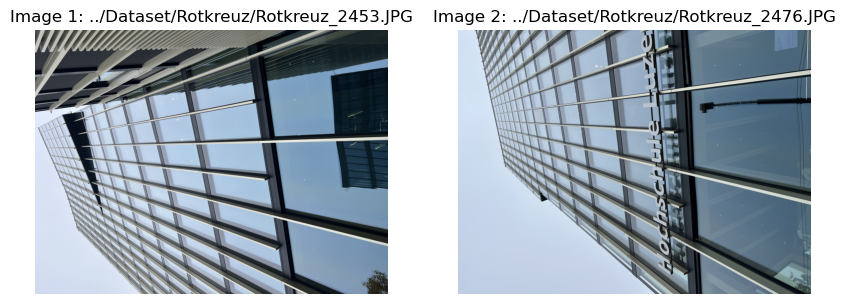

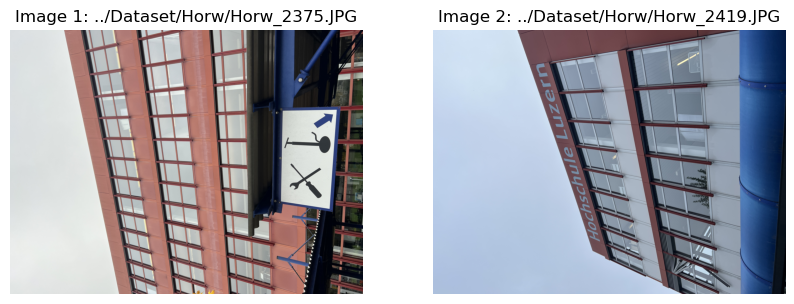

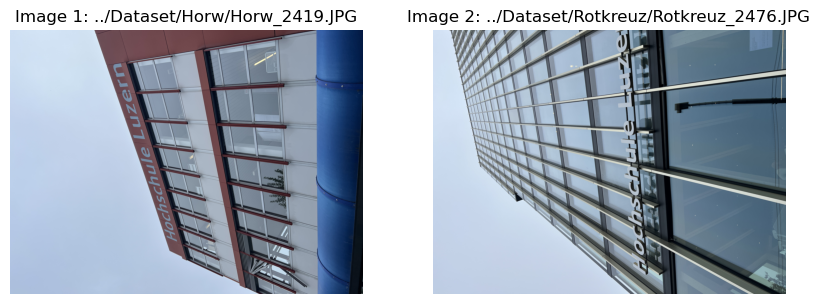

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/SELFCLEAN/Presentation_SelfClean/Dataset/Horw/Horw_2427.JPG'

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

# Iterate over the first 10 rows of your dataframe
for index, datapoint in dino_irrelevant.head(10).iterrows():
    path1 = datapoint["path_indices_1"]
    path2 = datapoint["path_indices_2"]
    
    # Open images using PIL
    img1 = Image.open(path1)
    img2 = Image.open(path2)
    
    # Create a figure and axis for the side-by-side display
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
    
    # Display images
    ax[0].imshow(img1)
    ax[0].axis('off')  # Hide axes for image 1
    ax[0].set_title(f'Image 1: {path1}')
    
    ax[1].imshow(img2)
    ax[1].axis('off')  # Hide axes for image 2
    ax[1].set_title(f'Image 2: {path2}')
    
    # Show the plot
    plt.show()
